In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import imutils

In [35]:
# image = cv2.imread('./arisu_mia.JPG')
image = cv2.imread('./business_card.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height=500)  # resize image to have a height of 500px

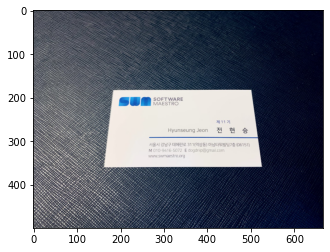

In [36]:
plt.imshow(image)
plt.show()

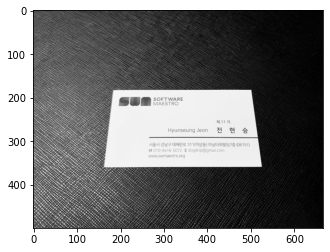

In [37]:
# Convert RGB image to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')  # cmap must be specified
plt.show()

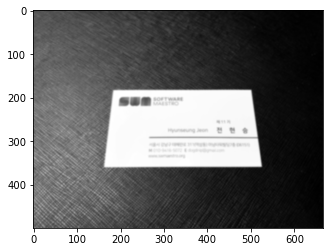

In [38]:
# Gaussian Blur for removing high frequency noise
# Also for Canny edge detection
gray = cv2.GaussianBlur(gray, (7, 7), 0)  

plt.imshow(gray, cmap='gray')
plt.show()

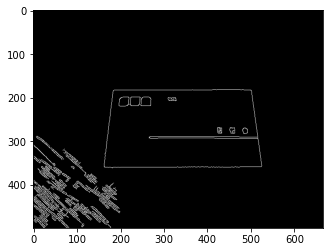

In [39]:
# Canny edge detection alg.
edged = cv2.Canny(gray, 75, 200)

plt.imshow(edged, cmap='gray')
plt.show()

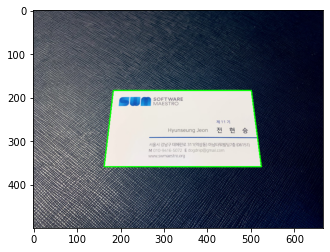

In [40]:
# Find the document area.

# Find the contours in the edged image.
# Contour: 폐곡선
# findContours()는 원본 이미지를 변경시키므로 이미지 copy()로 작업 필요
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# OpenCV 2.4, OpenCV 3, OpenCV 4 return contours differently. Cover it with imutils.
cnts = imutils.grab_contours(cnts)  

# contourArea 기준 큰 거부터 5개 가져오기
# 이후 for문에서 큰 Contour부터 고려함. 밖에서부터 안으로 줄여나간다고 생각
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]  

for c in cnts:
    # Contour approximation
    # approxPolyDP(): 인자로 주어진 곡선을 epslion값에 따라 꼭지점 수를 줄여 새로운 곡선을 만들어 반환
    epsilon = 0.02 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, epsilon, True)

    # Approximation한 Contour가 4개 점을 가진다면 (사각형이라면), approximation 성공으로 간주
    if len(approx) == 4:
        screenCnt = approx
        break

cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
plt.imshow(image)